<a href="https://colab.research.google.com/github/lala991204/DL-self-study/blob/master/3_2_simple_linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Dense layer는 심층 신경망 모델을 구성하는 가장 기본 layer이다. 각 layer 사이에 모든 뉴런이 서로 연결되어 있으므로 완전 연결층(Fully Connected Layer)이라고 부르기도 한다.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

# 샘플 데이터셋 생성
x = np.arange(1, 6)

# y = 3x + 2
y = 3 * x + 2
print(x)    # 입력 데이터: feature
print(y)    # 정답: label

[1 2 3 4 5]
[ 5  8 11 14 17]


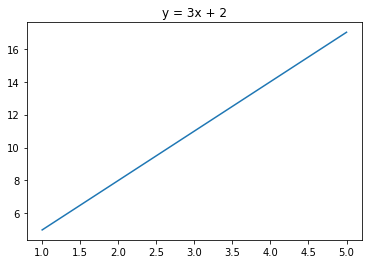

In [ ]:
# 시각화
plt.plot(x, y)
plt.title('y = 3x + 2')
plt.show()

Sequential API는 keras model을 생성, 훈련하는 가장 간단한 방법이다. 다만, 2개 이상의 다중 입력이나 다중 출력을 갖는 복잡한 구조를 다룰 때는 Functional API를 사용해야 한다.

In [ ]:
# 리스트형
model = tf.keras.Sequential([
        tf.keras.layers.Dense(10),
        tf.keras.layers.Dense(5),
        tf.keras.layers.Dense(1),
])

# add 함수로 레이어 추가
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(10))
model.add(tf.keras.layers.Dense(5))
model.add(tf.keras.layers.Dense(1))


# Sequential API 사용하여 모델 구성할 시에 반드시 첫 번째 layer는 input_shape 지정!
model = tf.keras.Sequential([
  # 입력 데이터의 shape=(150,4)인 경우 input_shape 지정 => 150개 샘플, 4개의 입력 변수 => [4]로 지정
  # Dense layer는 use_bias = True가 default임.
  tf.keras.layers.Dense(10, input_shape=[4]),
  tf.keras.layers.Dense(5),
  tf.keras.layers.Dense(1),
])

# 단순선형회귀 모델 y=ax+b 생성
model = tf.keras.Sequential([
        tf.keras.layers.Dense(1, input_shape=[1])   # 입력 변수 1개(x)
])           # 출력 값(y) => 예측 값

Trainable params는 모델 훈련 시 업데이트할 파라미터의 총 개수이며, Non-trainable params는 훈련 시 업데이트하지 않을 파라미터의 총 개수이다.
단순선형회귀 모델에서는 업데이트 파라미터가 w,b 두 개이다.

In [ ]:
# 모델 요약
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_18 (Dense)            (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


compile 단계에서는 훈련에서 적용할 optimizer, loss, metrics 등을 정의한다.
세 가지는 다음과 같은 방법으로 지정 가능하다.

In [ ]:
# 긴 문자열 지정(문자열로 지정할 시 기본값으로 설정된 hyperparameter 사용)
model.compile(optimizer='sgd', loss='mean_squared_error',
              metrics=['mean_squared_error', 'mean_absolute_error'])

# 짧은 문자열 지정
model.compile(optimizer='sgd', loss='mse', metrics=['mse','mae'])

# 클래스 인스턴스 지정(lr, momentum 등의 hyperparameter를 사용자가 직접 지정 가능)
model.compile(optimizer=tf.keras.optimizers.SGD(lr=0.005),
              loss=tf.keras.losses.MeanAbsoluteError(),
              metrics=[tf.keras.metrics.MeanAbsoluteError(),
                       tf.keras.metrics.MeanSquaredError()
                       ])

# 컴파일
model.compile(optimizer='sgd', loss='mse', metrics=['mae'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


In [ ]:
# 훈련(가중치(weight) 텐서를 update하는 과정)
model.fit(x, y, epochs=5)

Epoch 1/5
1/1 [==============================] - 1s 532ms/step - loss: 83.9480 - mae: 8.6153
Epoch 2/5
1/1 [==============================] - 0s 8ms/step - loss: 49.0451 - mae: 6.6276
Epoch 3/5
1/1 [==============================] - 0s 11ms/step - loss: 28.7046 - mae: 5.1101
Epoch 4/5
1/1 [==============================] - 0s 6ms/step - loss: 16.8503 - mae: 3.9515
Epoch 5/5
1/1 [==============================] - 0s 9ms/step - loss: 9.9414 - mae: 3.0668


위는 반복 훈련 횟수가 충분하지 않아 학습이 덜 된 '과소적합' 상태라고 볼 수 있다.
이번에는 epoch를 늘려보자!

In [ ]:
# 단순 선형회귀 모델 생성
model = tf.keras.Sequential([
        tf.keras.layers.Dense(1, input_shape=[1])
])

# 컴파일
model.compile(optimizer='sgd', loss='mse', metrics=['mae'])

# 훈련
history = model.fit(x, y, epochs=1200)    # epoch별 훈련 loss, metrics가 딕셔너리 형태로 저장됨.

Epoch 1/1200
1/1 [==============================] - 0s 365ms/step - loss: 88.4025 - mae: 8.8332
Epoch 2/1200
1/1 [==============================] - 0s 12ms/step - loss: 51.6374 - mae: 6.7933
Epoch 3/1200
1/1 [==============================] - 0s 12ms/step - loss: 30.2117 - mae: 5.2358
Epoch 4/1200
1/1 [==============================] - 0s 14ms/step - loss: 17.7251 - mae: 4.0467
Epoch 5/1200
1/1 [==============================] - 0s 13ms/step - loss: 10.4477 - mae: 3.1388
Epoch 6/1200
1/1 [==============================] - 0s 13ms/step - loss: 6.2060 - mae: 2.4456
Epoch 7/1200
1/1 [==============================] - 0s 13ms/step - loss: 3.7333 - mae: 1.9162
Epoch 8/1200
1/1 [==============================] - 0s 17ms/step - loss: 2.2916 - mae: 1.5119
Epoch 9/1200
1/1 [==============================] - 0s 19ms/step - loss: 1.4506 - mae: 1.2031
Epoch 10/1200
1/1 [==============================] - 0s 11ms/step - loss: 0.9598 - mae: 0.9672
Epoch 11/1200
1/1 [==============================] - 

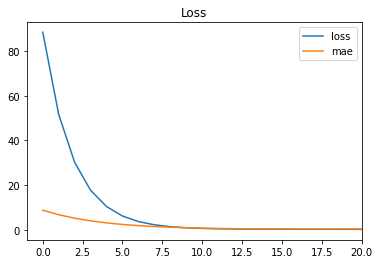

In [ ]:
# 20 epoch까지 Loss 수렴에 대한 시각화
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['mae'], label='mae')
plt.xlim(-1,20)
plt.title('Loss')
plt.legend()
plt.show()

별도의 데이터셋을 검증용으로 활용하는 방법을 cross-validation(교차 검증)이라 한다. 교차 검증 방법에는 Hold-out, K-Fold 교차 검증 등이 있다.

In [ ]:
# 검증
model.evaluate(x, y)

1/1 [==============================] - 0s 135ms/step - loss: 8.6863e-05 - mae: 0.0080


[8.686322689754888e-05, 0.007999706082046032]

In [ ]:
# 예측
model.predict([10])

array([[32.038662]], dtype=float32)

식이 y=3x+2이므로, y=32에 근사하게 예측한 것을 확인할 수 있다.